# 50.504 - Machine Learning: Predicting Cancer Survival Time

In [1]:
# Download the data
import os
import tarfile
import urllib

DATA_URL = "https://wiki.cancerimagingarchive.net/download/attachments/16056854/NSCLC%20Radiomics%20Lung1.clinical-version3-Oct%202019.csv?version=1&modificationDate=1572013183040&api=v2"
DOWNLOAD_PATH = "data.csv"

def fetch_data(data_url = DATA_URL, download_path = DOWNLOAD_PATH):
    urllib.request.urlretrieve(data_url, download_path)

In [2]:
# Load the data to panda

# Load the data to Panda
import pandas as pd
def load_data(download_path = DOWNLOAD_PATH):
    return pd.read_csv(download_path)

In [3]:
fetch_data()
data = load_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               400 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         380 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 33.1+ KB


In [4]:
data.describe()

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Survival.time,deadstatus.event
count,400.000000,421.000000,422.000000,422.000000,422.000000,422.000000
mean,68.036500,2.475059,1.355450,0.030806,988.857820,0.883886
std,10.083498,1.130727,1.218116,0.294847,1035.567789,0.320742
min,33.684900,1.000000,0.000000,0.000000,10.000000,0.000000
25%,61.234800,2.000000,0.000000,0.000000,261.000000,1.000000
50%,68.583400,2.000000,2.000000,0.000000,545.500000,1.000000
75%,75.814475,4.000000,2.000000,0.000000,1397.000000,1.000000
max,91.704300,5.000000,4.000000,3.000000,4454.000000,1.000000


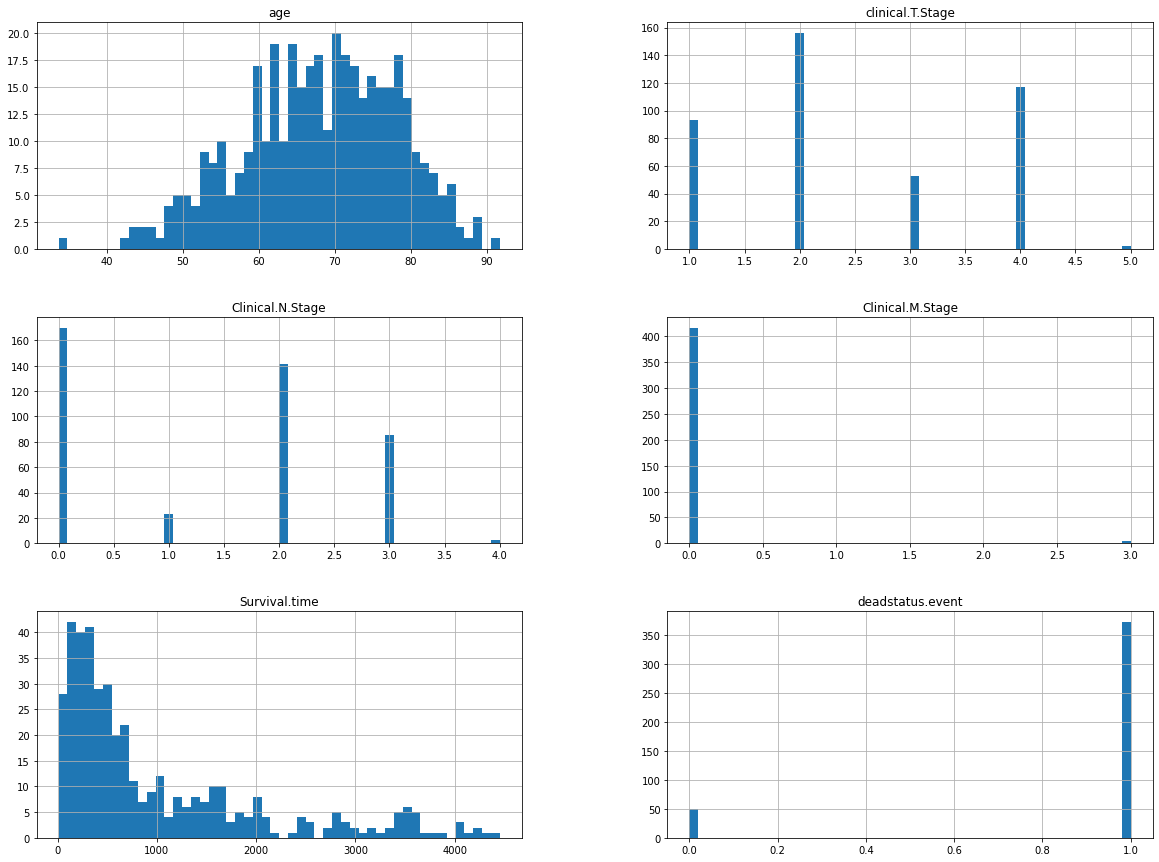

In [5]:
# Plot histogram
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [6]:
# Handling categorial data
data.info()
data[["Overall.Stage"]]

# try to use OrdinalEncoder



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         422 non-null    object 
 1   age               400 non-null    float64
 2   clinical.T.Stage  421 non-null    float64
 3   Clinical.N.Stage  422 non-null    int64  
 4   Clinical.M.Stage  422 non-null    int64  
 5   Overall.Stage     421 non-null    object 
 6   Histology         380 non-null    object 
 7   gender            422 non-null    object 
 8   Survival.time     422 non-null    int64  
 9   deadstatus.event  422 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 33.1+ KB


,Overall.Stage
0,IIIb
1,I
2,IIIb
3,II
4,IIIb
...,...
417,I
418,IIIb
419,II
420,IIIa
